### Imports

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

### Data

In [4]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
# Load in the DataFrame
# We don't read row name index (index_col=0) a seperated column

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 129971 observations and 13 features in this dataset. 



In [7]:
print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 



In [8]:
print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [9]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


### Make comparisons between groups of a feature and Compute summary statistics

In [11]:
country = df.groupby("country")
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [14]:
# Select top 5 highest average points among all the 44 countries
country.mean().sort_values(by="points", ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


### By different kinds of Wines

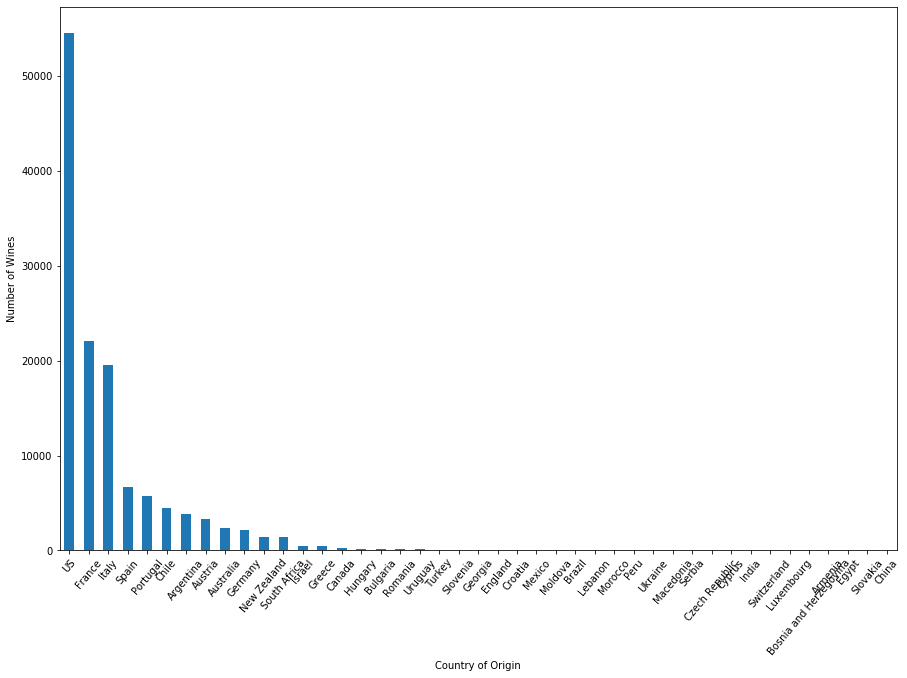

In [15]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

### By highest rated wine

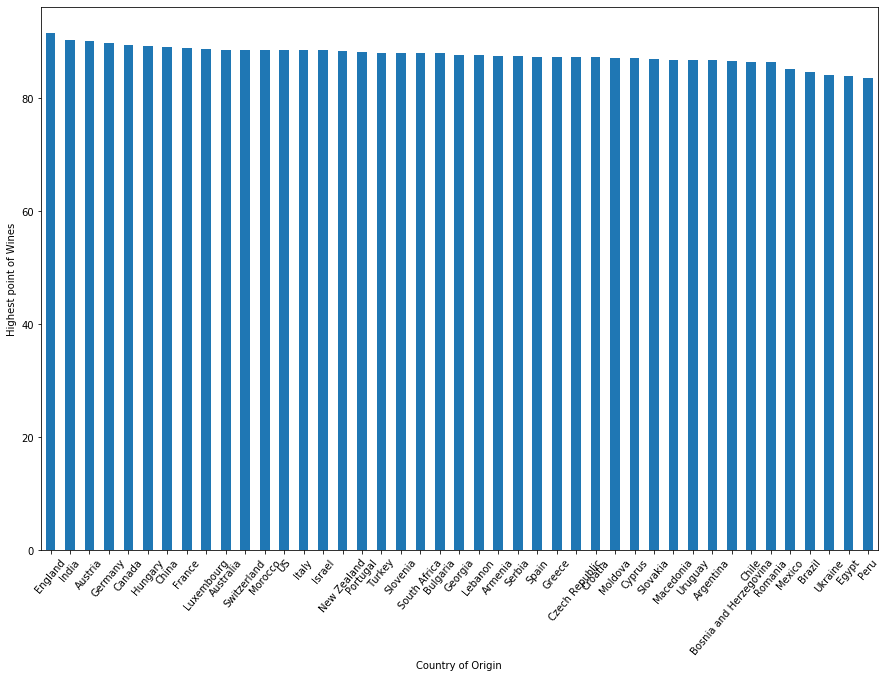

In [22]:
plt.figure(figsize=(15,10))
country.mean().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

### Set up WordCloud

In [24]:
text = df.description[0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [30]:
text8 = df.description[8] # Reviews
text8

"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint."

In [27]:
# Create a wordcloud image
wordcloud = WordCloud().generate(text)
wordcloud

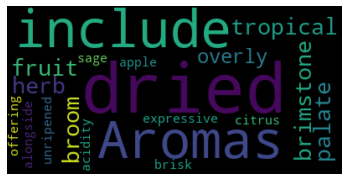

In [28]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

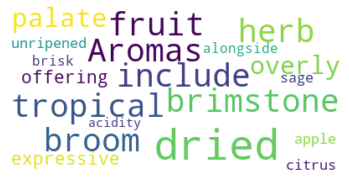

In [31]:
# lower max_font_size
# Changing the maximum number of word
# Lighten the background
wordcloud8 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud8, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
# interpolation="bilinear" makes the displayed image appear more smoothly

In [34]:
# Save the images in the img folder:
wordcloud.to_file("first_review.png")
wordcloud8.to_file("eighth_review.png")

Combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines

In [36]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


In [37]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

In [40]:
# Generate a word cloud image
wordcloudwhole = WordCloud(stopwords=stopwords, background_color="white").generate(text)

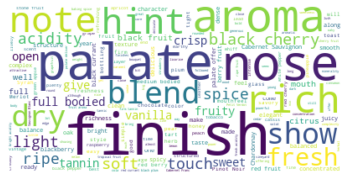

In [42]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloudwhole, interpolation='bilinear')
plt.axis("off")
plt.show()

### Masking Image

In [44]:
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
# Masking functions require all white part of the mask should be 255 not 0 (integer type)
# Using the transform_format() function to swap number 0 to 255

In [47]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [48]:
# creating a new mask with the same shape as the mask and apply the function transform_format()
# to each value in each row of the previous mask

In [49]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [50]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [51]:
# In the WordCloud function,
# there is a mask argument that takes in the transformed mask 

In [52]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='#6a097d')


In [53]:
# Generate a wordcloud
wc.generate(text)

In [54]:
# Store to file
wc.to_file("wine.png")

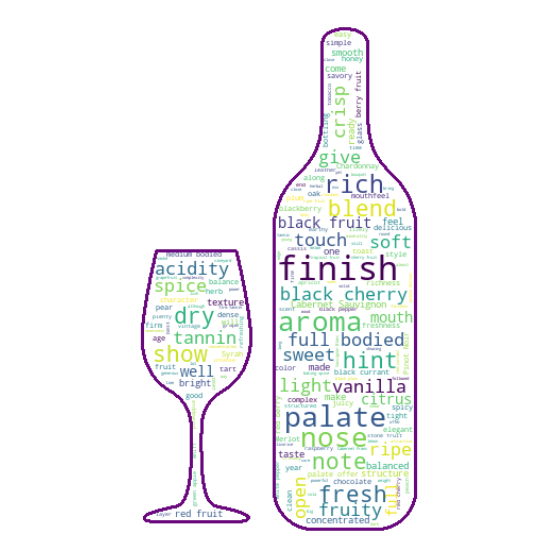

In [55]:
# Show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Flag shape

In [59]:
# Join all reviews of each country:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)
ind = " ".join(review for review in df[df["country"]=="India"].description)

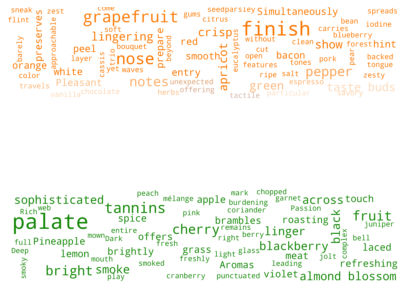

In [62]:
# Generate a word cloud image
mask = np.array(Image.open("india_flag.png"))
wordcloud_ind = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(ind)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ind.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("india_flag_wine.png", format="png")

plt.show()